In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel(r'C:\Users\sw.shin\Desktop\sw.shin\06_코딩\연습용 자료들\07_KODEX200(2007.1~).xlsx', sheet_name='Sheet1', index_col=0)

In [2]:
df['daily return']=df.pct_change()

In [3]:
df

,KODEX 200,daily return
D A T E,,
2007-01-02,18970,NaN
2007-01-03,18700,-0.014233
2007-01-04,18430,-0.014439
2007-01-05,18300,-0.007054
2007-01-08,18110,-0.010383
...,...,...
2019-12-09,27845,0.004509
2019-12-10,27985,0.005028
2019-12-11,28095,0.003931


In [4]:
df.index

DatetimeIndex(['2007-01-02', '2007-01-03', '2007-01-04', '2007-01-05',
               '2007-01-08', '2007-01-09', '2007-01-10', '2007-01-11',
               '2007-01-12', '2007-01-15',
               ...
               '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05',
               '2019-12-06', '2019-12-09', '2019-12-10', '2019-12-11',
               '2019-12-12', '2019-12-13'],
              dtype='datetime64[ns]', name='D A T E', length=3203, freq=None)

In [5]:
# 전략 : 매년 11월 초에 산다. 매년 5월 초에 판다.
buy_month=[11]
buy_year=[]
buy_day=[]
sell_month=[5]
sell_year=[]
sell_day=[]
for i in df.index:
    if i.month in buy_month:
        if i.year not in buy_year:
            buy_day.append(i)
            buy_year.append(i.year)
for j in df.index:
    if j.month in sell_month:
        if j.year not in sell_year:
            sell_day.append(j)
            sell_year.append(j.year)

In [6]:
buy_day

[Timestamp('2007-11-01 00:00:00'),
 Timestamp('2008-11-03 00:00:00'),
 Timestamp('2009-11-02 00:00:00'),
 Timestamp('2010-11-01 00:00:00'),
 Timestamp('2011-11-01 00:00:00'),
 Timestamp('2012-11-01 00:00:00'),
 Timestamp('2013-11-01 00:00:00'),
 Timestamp('2014-11-03 00:00:00'),
 Timestamp('2015-11-02 00:00:00'),
 Timestamp('2016-11-01 00:00:00'),
 Timestamp('2017-11-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00')]

In [7]:
sell_day

[Timestamp('2007-05-02 00:00:00'),
 Timestamp('2008-05-02 00:00:00'),
 Timestamp('2009-05-04 00:00:00'),
 Timestamp('2010-05-03 00:00:00'),
 Timestamp('2011-05-02 00:00:00'),
 Timestamp('2012-05-02 00:00:00'),
 Timestamp('2013-05-02 00:00:00'),
 Timestamp('2014-05-02 00:00:00'),
 Timestamp('2015-05-04 00:00:00'),
 Timestamp('2016-05-02 00:00:00'),
 Timestamp('2017-05-02 00:00:00'),
 Timestamp('2018-05-02 00:00:00'),
 Timestamp('2019-05-02 00:00:00')]

In [10]:
# 보유/미보유 여부 입력하기
df['보유']=False
for day in df.index:
    if buy_day[0]<=day<sell_day[1]:
        df.at[day, '보유']=True
    elif buy_day[1]<=day<sell_day[2]:
        df.at[day, '보유']=True
    elif buy_day[2]<=day<sell_day[3]:
        df.at[day, '보유']=True
    elif buy_day[3]<=day<sell_day[4]:
        df.at[day, '보유']=True
    elif buy_day[4]<=day<sell_day[5]:
        df.at[day, '보유']=True
    elif buy_day[5]<=day<sell_day[6]:
        df.at[day, '보유']=True
    elif buy_day[6]<=day<sell_day[7]:
        df.at[day, '보유']=True
    elif buy_day[7]<=day<sell_day[8]:
        df.at[day, '보유']=True
    elif buy_day[8]<=day<sell_day[9]:
        df.at[day, '보유']=True
    elif buy_day[9]<=day<sell_day[10]:
        df.at[day, '보유']=True
    elif buy_day[10]<=day<sell_day[11]:
        df.at[day, '보유']=True
    elif buy_day[11]<=day<sell_day[12]:
        df.at[day, '보유']=True        
    elif buy_day[12]<=day:
        df.at[day, '보유']=True

In [12]:
# 초기 자본금 백만원
df['buy11,sell5']=1000000
df['buy5,sell11']=1000000
df

,KODEX 200,daily return,보유,"buy11,sell5","buy5,sell11"
D A T E,,,,,
2007-01-02,18970,NaN,False,1000000,1000000
2007-01-03,18700,-0.014233,False,1000000,1000000
2007-01-04,18430,-0.014439,False,1000000,1000000
2007-01-05,18300,-0.007054,False,1000000,1000000
2007-01-08,18110,-0.010383,False,1000000,1000000
...,...,...,...,...,...
2019-12-09,27845,0.004509,True,1000000,1000000
2019-12-10,27985,0.005028,True,1000000,1000000
2019-12-11,28095,0.003931,True,1000000,1000000


In [20]:
# buy11,sell5포트폴리오 운영
for i in range(len(df.index)-1):
    if df.at[df.index[i],'보유']==True:
        df.at[df.index[i+1], 'buy11,sell5']=df.at[df.index[i],'buy11,sell5']*(1+df.at[df.index[i], 'daily return'])
    else:
        df.at[df.index[i+1],'buy11,sell5']=df.at[df.index[i],'buy11,sell5']
        
df

,KODEX 200,daily return,보유,"buy11,sell5","buy5,sell11"
D A T E,,,,,
2007-01-02,18970,NaN,False,1000000,1000000
2007-01-03,18700,-0.014233,False,1000000,1000000
2007-01-04,18430,-0.014439,False,1000000,971534
2007-01-05,18300,-0.007054,False,1000000,943479
2007-01-08,18110,-0.010383,False,1000000,930168
...,...,...,...,...,...
2019-12-09,27845,0.004509,True,1737874,522064
2019-12-10,27985,0.005028,True,1745710,522064
2019-12-11,28095,0.003931,True,1754487,522064


In [21]:
# buy5, sell11 포트폴리오 운영
for i in range(1,len(df.index)-1):
    if df.at[df.index[i],'보유']==False:
        df.at[df.index[i+1], 'buy5,sell11']=df.at[df.index[i],'buy5,sell11']*(1+df.at[df.index[i], 'daily return'])
    else:
        df.at[df.index[i+1],'buy5,sell11']=df.at[df.index[i],'buy5,sell11']
df

,KODEX 200,daily return,보유,"buy11,sell5","buy5,sell11"
D A T E,,,,,
2007-01-02,18970,NaN,False,1000000,1000000
2007-01-03,18700,-0.014233,False,1000000,1000000
2007-01-04,18430,-0.014439,False,1000000,985767
2007-01-05,18300,-0.007054,False,1000000,971534
2007-01-08,18110,-0.010383,False,1000000,964681
...,...,...,...,...,...
2019-12-09,27845,0.004509,True,1737874,839615
2019-12-10,27985,0.005028,True,1745710,839615
2019-12-11,28095,0.003931,True,1754487,839615


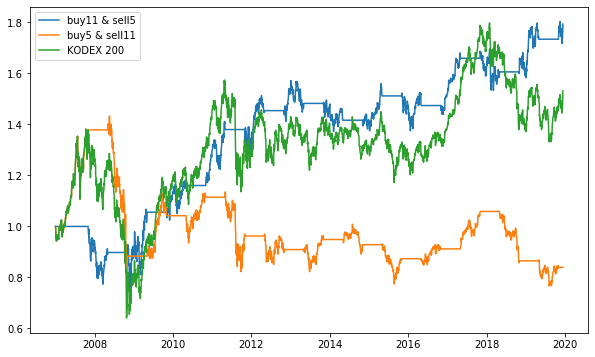

In [22]:
TIGER200=df['KODEX 200']/df['KODEX 200'][0]
buy11_sell5=df['buy11,sell5']/df['buy11,sell5'][0]
buy5_sell11=df['buy5,sell11']/df['buy5,sell11'][0]

plt.figure(figsize=(10,6))
plt.plot(buy11_sell5, label='buy11 & sell5')
plt.plot(buy5_sell11, label='buy5 & sell11')
plt.plot(TIGER200, label='KODEX 200')
plt.legend()

In [100]:
df['Portfolio'][0]

1000000